## <font>Processo de Construção, Treinamento, Avaliação e Seleção de Modelos Para Classificação</font>

## Modelo Preditivo de Desenvolvimento de Doença Hepática

![title](imagens/ilustracao.jpg)

## Objetivo

O objetivo é trazer um passo a passo completo do processo de construção, treinamento, 
avaliação e seleção de modelos para classificação, sendo que todo o processo será demonstrado de uma  ponta a outra, desde a definição do problema de negócio, até as previsões com o modelo treinado.


## Definição do problema e fonte de dados

Tem aumentado de forma contínua o número de pacientes com doença hepática devido ao consumo excessivo de álcool, inalação de gases nocivos, ingestão de alimentos contaminados e uso de drogas e anabolizantes. Neste mini-projeto vamos construir um modelo de Machine Learning capaz de prever se um paciente vai ou não desenvolver uma doença hepática com base em diversas características do paciente. Esse modelo pode ajudar médicos, hospitais ou governos a planejar melhor o orçamento de gastos de saúde ou mesmo criar políticas de prevenção. Como nosso objetivo é prever uma classe (sim ou não), usaremos aprendizado supervisionado para classificação, criando diferentes versões do modelo com diferentes algoritmos e passaremos por todo o processo de Machine Learning de ponta a ponta. Usaremos como fonte de dados o dataset disponível no link abaixo:


https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)


In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [3]:
# Imports
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## Carregando o Conjunto de dados

In [4]:
# Carregando os dados
dados = pd.read_csv('dados/dataset.csv')

In [5]:
# Shape
dados.shape

(583, 11)

In [6]:
# Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
# Amostra dos dados
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
398,38,Male,0.8,0.2,208,25,50,7.1,3.7,1.0,1
93,60,Male,5.8,2.7,204,220,400,7.0,3.0,0.7,1
531,40,Male,30.8,18.3,285,110,186,7.9,2.7,0.5,1
23,40,Male,1.9,1.0,231,16,55,4.3,1.6,0.6,1
53,38,Male,1.1,0.3,198,86,150,6.3,3.5,1.2,1
349,49,Female,0.8,0.2,158,19,15,6.6,3.6,1.2,2
404,22,Male,0.8,0.2,198,20,26,6.8,3.9,1.3,1
560,66,Male,15.2,7.7,356,321,562,6.5,2.2,0.4,1
545,45,Female,0.7,0.2,153,41,42,4.5,2.2,0.9,2
421,26,Male,1.0,0.3,163,48,71,7.1,3.7,1.0,2


## Análise Exploratória de Dados

In [8]:
# Tipo de dados
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [9]:
# Variáveis categóricas
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [10]:
# Variáveis não categóricas
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploração das Variáveis Numéricas

In [11]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


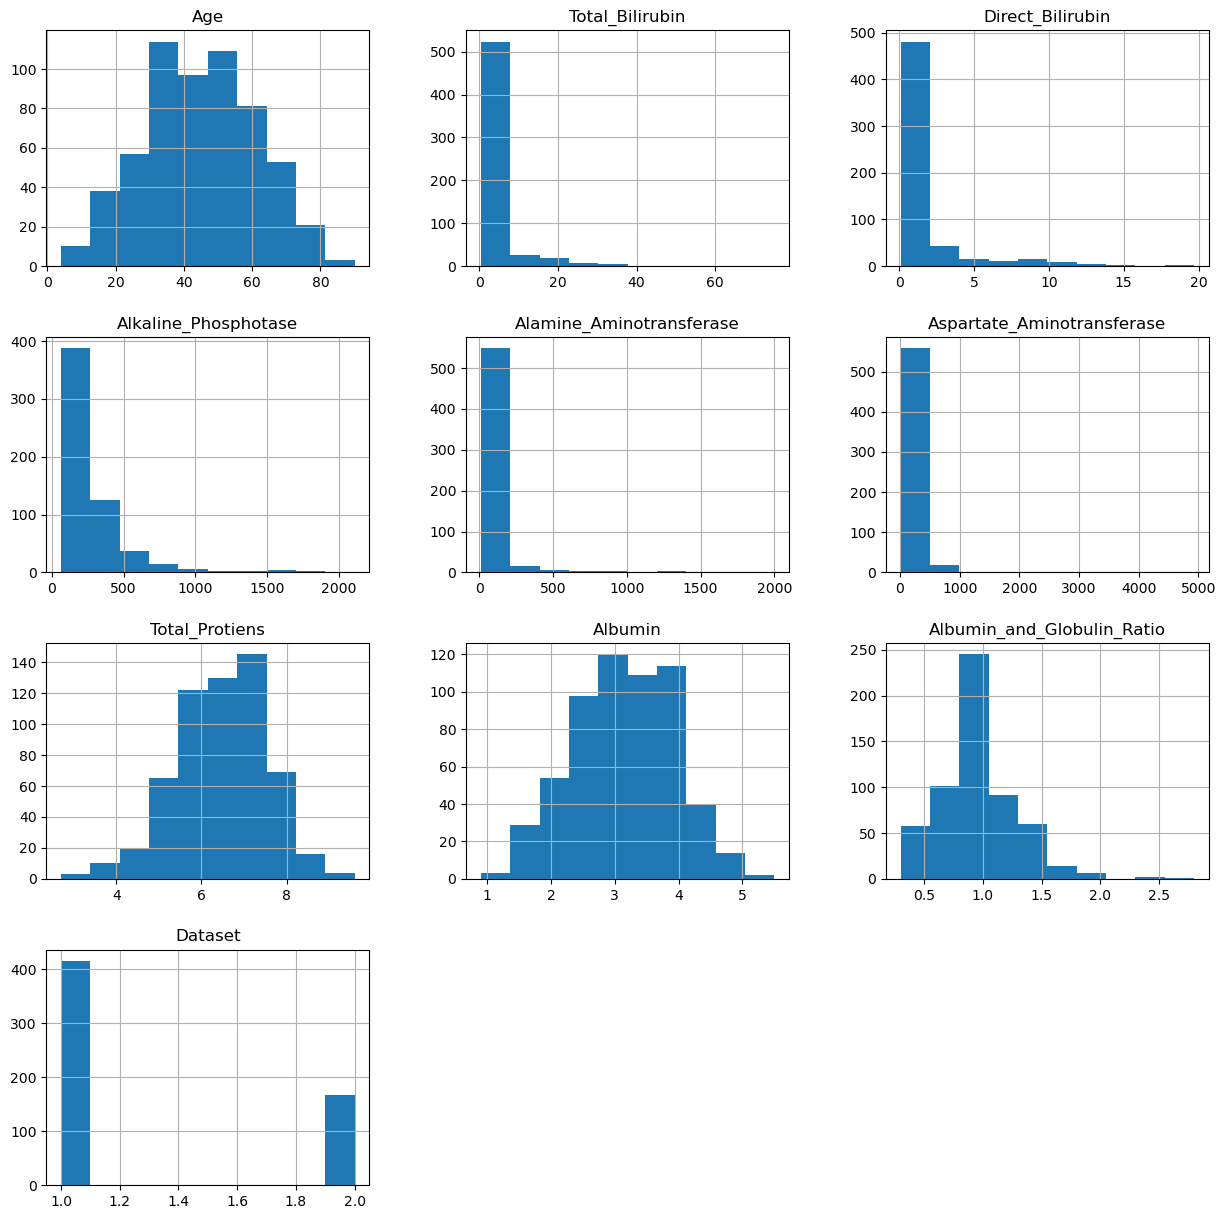

In [12]:
# plot
dados.hist(figsize = (15,15), bins = 10)
plt.show()

Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.

A coluna dataset (variável target) tem '1' para doença hepática e '2' para nenhuma doença hepática. Vamos ajustar a variável colocando valores mais fáceis de interpretar. A classe negativa (não tem a doença) será zero.

In [13]:
# Função para ajustar a variável target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [14]:
# Aplicando a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [15]:
# Ajustando o nome da variável target
dados.rename({'Dataset': 'Target'}, axis = 'columns', inplace = True)

In [16]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
167,47,Female,3.0,1.5,292,64,67,5.6,1.8,0.47,1
238,35,Female,0.9,0.2,190,40,35,7.3,4.7,1.80,0
367,60,Male,2.2,1.0,271,45,52,6.1,2.9,0.90,0
392,41,Male,7.5,4.3,149,94,92,6.3,3.1,0.90,1
534,39,Male,1.6,0.8,230,88,74,8.0,4.0,1.00,0


In [17]:
# Correlação entre as variáveis
dados.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


### Exploração da Variável Categórica

In [18]:
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo masculino: 441.
Número de pacientes do sexo feminino: 142.


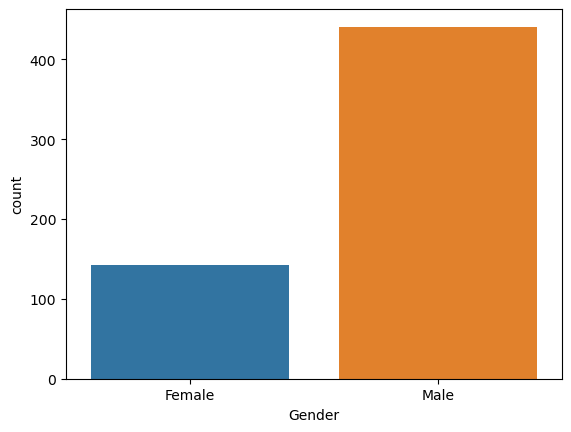

In [19]:
# Plot
sns.countplot(data = dados, x = 'Gender', label = 'Count')

# Value counts
M, F = dados['Gender'].value_counts()

# Print
print(f'Número de pacientes do sexo masculino: {M}.')
print(f'Número de pacientes do sexo feminino: {F}.')

Vamos aproveitar e já transformar a variável categórica em sua representação numérica usando label encoding. Além de reduzir o trabalho mais tarde, facilitará a criação de gráficos a seguir.

In [20]:
# Função para label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [21]:
# Aplicando a função
dados['Gender'] = dados['Gender'].map(encoding_func)

In [22]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
566,50,1,1.0,0.3,191,22,31,7.8,4.0,1.00,0
513,69,0,0.9,0.2,215,32,24,6.9,3.0,0.70,1
27,34,0,6.2,3.0,240,1680,850,7.2,4.0,1.20,1
495,32,0,0.7,0.2,165,31,29,6.1,3.0,0.96,0
257,44,0,0.8,0.2,335,148,86,5.6,3.0,1.10,1


### Verificando a Relação Entre Atributos

In [23]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


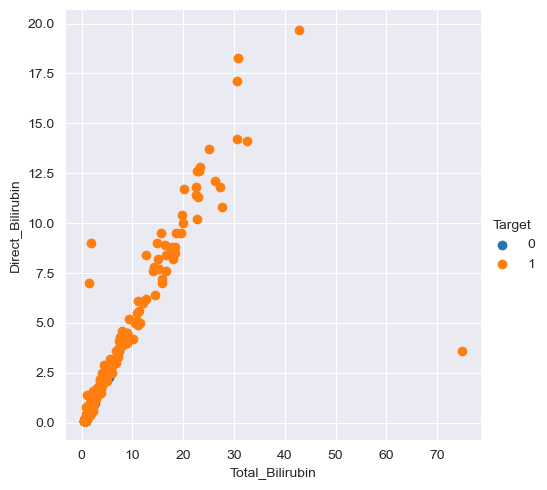

In [24]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

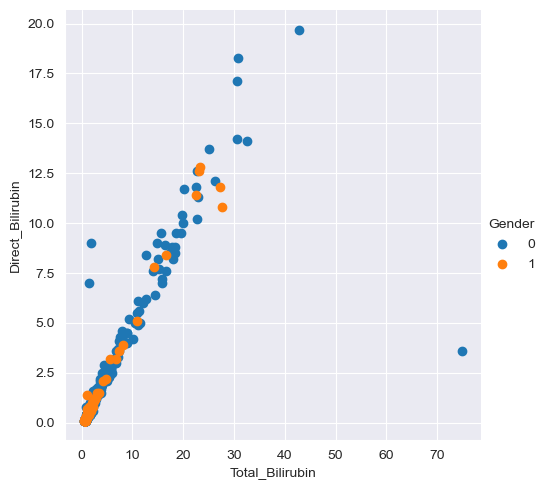

In [25]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

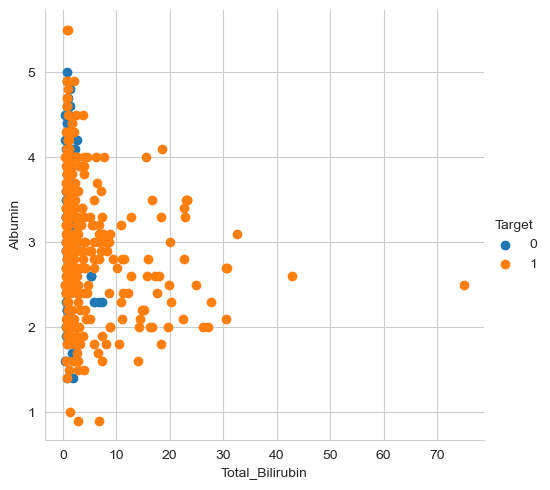

In [26]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

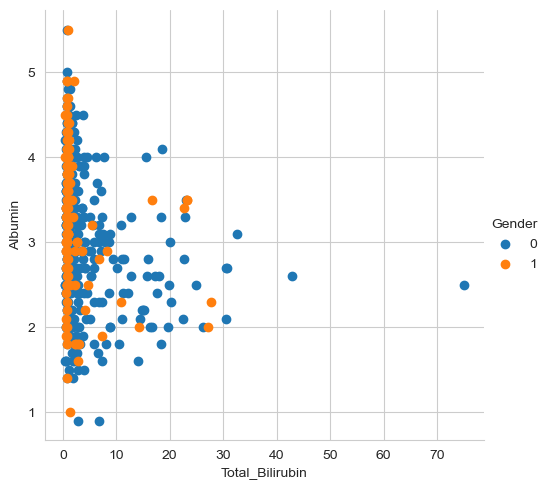

In [27]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

### Verificando Valores Ausentes e Registros Duplicados

In [28]:
# Verificando valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [29]:
# Verificando registros duplicados (complete cases)
# Complete cases também se refere a linhas onde não há valores ausentes
dados[dados.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Limpeza de Dados

### Tratamento de Registros Duplicados

In [30]:
dados.shape

(583, 11)

In [31]:
# Removendo registros duplicados (remove dados duplicados)
dados = dados.drop_duplicates()
print(dados.shape)

(570, 11)


### Tratamento de Outliers

In [32]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<AxesSubplot:xlabel='Alamine_Aminotransferase'>

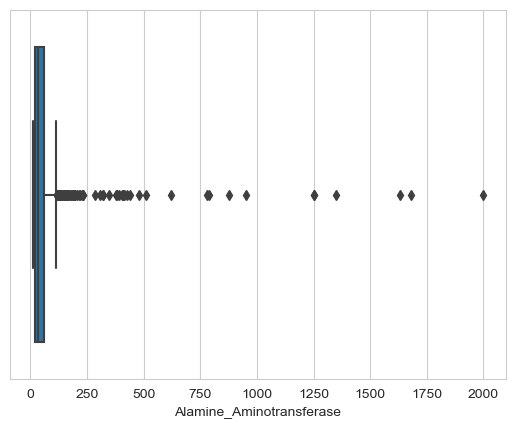

In [33]:
# Boxplot
sns.boxplot(dados.Alamine_Aminotransferase)

In [34]:
# Contagem de frequencia por valor
dados.Alamine_Aminotransferase.sort_values(ascending = False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

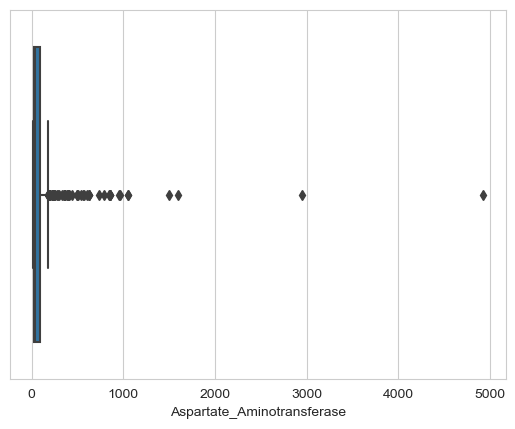

In [35]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase)

In [36]:
# Contagem de frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [37]:
# Mantém somente os registros onde o valor for menor ou igual a 3000
dados = dados[dados.Aspartate_Aminotransferase <= 3000]
dados.shape

(569, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

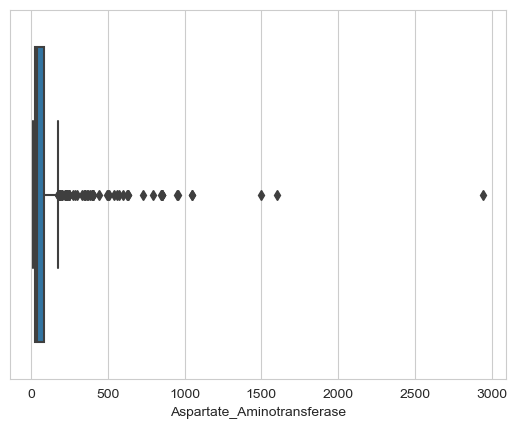

In [38]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase)

In [39]:
# Contagem de frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [40]:
# Mantém somente os registros onde o valor for menor ou igual a 2500
dados = dados[dados.Aspartate_Aminotransferase <= 2500]
dados.shape

(568, 11)

In [41]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


### Tratamento de Valores Ausentes

In [42]:
# Verifica se há valor ausente
dados.isnull().values.any()

True

In [43]:
# Verifica quantas colunas tem valor ausente
dados.isnull().values.any().sum()

1

In [44]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [45]:
dados.shape

(568, 11)

In [46]:
# Drop dos registros com valores ausentes em qualquer coluna (any)
dados = dados.dropna(how = 'any')

In [47]:
dados.shape

(564, 11)

In [48]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target


In [49]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
265,4,0,0.9,0.2,348,30,34,8.0,4.0,1.0,0
356,33,0,0.7,0.2,256,21,30,8.5,3.9,0.8,1
160,60,0,11.0,4.9,750,140,350,5.5,2.1,0.6,1
301,51,1,0.9,0.2,280,21,30,6.7,3.2,0.8,1
260,42,0,16.4,8.9,245,56,87,5.4,2.0,0.5,1


## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [50]:
# Data a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_Bilirubin
dados = dados.drop('Direct_Bilirubin', 1)

In [51]:
dados.shape

(564, 10)

### Divisão em Treino e Teste

In [52]:
dados.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,195,27,59,7.3,2.4,0.40,1


In [53]:
# Cria um objeto separado para variável target
y = dados.Target

In [54]:
# Cria um objeto separado para as variáveis de entrada
X = dados.drop('Target', axis = 1)

In [55]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = dados.Target)

In [56]:
len(X_treino)

423

In [57]:
len(X_teste)

141

In [58]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(423, 9) (141, 9) (423,) (141,)


In [59]:
X_treino.head(2)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
205,45,0,2.5,163,28,22,7.6,4.0,1.1
390,72,0,0.8,148,23,35,6.0,3.0,1.0


### Balanceamento de Classe

In [60]:
y_treino.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [61]:
# Instala o pacote
!pip install -q imblearn

In [62]:
# Carrega a função SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [63]:
# Vamos aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

In [64]:
# Aplica o oversampling (deve ser feito somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [65]:
len(X_res)

602

In [66]:
len(y_res)

602

In [67]:
y_res.value_counts()

1    301
0    301
Name: Target, dtype: int64

In [68]:
# Ajusta o nome do dataset de treino para X
X_treino = X_res

In [69]:
# Ajusta o nome do dataset de treino para y
y_treino = y_res

### Padronização dos Dados

Padronização (ou normalização do escore Z ou em inglês Standardization ou ainda 
Standard Scaler) é o processo de redimensionamento dos recursos (variáveis) para que eles 
tenham as propriedades de uma distribuição normal com μ = 0 e σ = 1, onde μ é a média e σ é o 
desvio padrão da média

In [70]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [71]:
# Calculamos média e desvio padrão dos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

Age                            44.033223
Gender                          0.205980
Total_Bilirubin                 2.644844
Alkaline_Phosphotase          265.898671
Alamine_Aminotransferase       62.539867
Aspartate_Aminotransferase     77.632890
Total_Protiens                  6.495412
Albumin                         3.227835
Albumin_and_Globulin_Ratio      0.995341
dtype: float64
Age                            16.386418
Gender                          0.404752
Total_Bilirubin                 5.565745
Alkaline_Phosphotase          217.765138
Alamine_Aminotransferase      140.108691
Aspartate_Aminotransferase    144.413553
Total_Protiens                  1.004680
Albumin                         0.739134
Albumin_and_Globulin_Ratio      0.305566
dtype: float64


In [72]:
# Padronização
X_treino = (X_treino - treino_mean) / treino_std

In [73]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.058999,-0.508904,-0.026024,-0.472521,-0.246522,-0.385233,1.099442,1.044689,0.342508
1,1.706705,-0.508904,-0.331464,-0.541403,-0.282209,-0.295214,-0.493105,-0.308246,0.015247
2,-1.588707,-0.508904,-0.331464,0.073939,0.067520,0.431865,-0.990776,-0.984713,-0.639276
3,-0.124080,-0.508904,1.123867,0.028018,-0.225110,-0.115175,-0.692173,-1.661180,-1.621061
4,-0.124080,-0.508904,-0.331464,-0.637837,-0.239385,-0.329837,-1.587981,-0.714126,0.669770


In [74]:
# Describe
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,1.212577e-17,1.235630e-15,-1.292801e-16,-1.143419e-16,-5.265260e-17,-2.208459e-17,2.533595e-15,-4.208520e-16,4.881662e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.443073e+00,-5.089040e-01,-4.033322e-01,-9.317316e-01,-3.749936e-01,-4.683279e-01,-3.777733e+00,-3.149407e+00,-2.275584e+00
25%,-7.343412e-01,-5.089040e-01,-3.402511e-01,-4.357845e-01,-2.893458e-01,-3.783086e-01,-6.921731e-01,-6.138493e-01,-6.392764e-01
50%,5.899870e-02,-5.089040e-01,-3.134969e-01,-3.117977e-01,-2.251100e-01,-2.952139e-01,9.099608e-03,-3.765876e-02,1.524685e-02
75%,7.913125e-01,-5.089040e-01,-1.517935e-01,7.164291e-02,-7.701069e-02,-8.055262e-02,6.523573e-01,7.741017e-01,5.094180e-01
max,2.805175e+00,1.961743e+00,1.300009e+01,8.468304e+00,1.154432e+01,1.054172e+01,3.090126e+00,3.074090e+00,5.905956e+00


In [75]:
# Usamos média e desvio de treino para padronizar o conjunto de dados de teste
X_teste = (X_teste - treino_mean) / treino_std

In [76]:
# Describe
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.429210,-0.508904,-0.331464,-0.545995,-0.253659,-0.219044,-1.488447,-0.984713,0.015247
448,0.242077,1.961743,-0.331464,-0.568955,-0.260797,-0.364459,-0.493105,-0.849419,-0.966538
509,0.120025,-0.508904,3.118209,-0.054640,0.552857,3.201688,-1.090310,-0.308246,0.669770
415,1.584652,-0.508904,-0.241629,1.947517,0.217404,-0.260591,-2.881925,-0.714126,-0.966538
56,-0.673315,-0.508904,-0.331464,-0.311798,-0.260797,-0.378309,1.497579,1.044689,0.015247


###  Construção, Treinamento e Avaliação do Modelo 1 com Regressão Logística (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Para a primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark.

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

In [77]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [78]:
# Criando o modelo com GridSearch
# Vários modelos são criados com combinações diferentes de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(),
                        tuned_params_v1,
                        scoring = 'roc_auc',
                        n_jobs = -1)

In [79]:
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [80]:
# Selecionando o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=1000)

In [81]:
# Previsões com dado de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [82]:
# Mostrando as 10 primeiras previsões
y_pred_v1[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [83]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [84]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([[7.88245130e-01, 2.11754870e-01],
       [5.02906552e-01, 4.97093448e-01],
       [6.87721921e-06, 9.99993123e-01],
       [8.37048639e-01, 1.62951361e-01],
       [6.70899483e-01, 3.29100517e-01],
       [6.50600967e-01, 3.49399033e-01],
       [7.88953028e-01, 2.11046972e-01],
       [5.55987930e-02, 9.44401207e-01],
       [5.67460736e-01, 4.32539264e-01],
       [2.22258424e-03, 9.97777416e-01]])

In [85]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [86]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([0.21175487, 0.49709345, 0.99999312, 0.16295136, 0.32910052,
       0.34939903, 0.21104697, 0.94440121, 0.43253926, 0.99777742])

In [87]:
# Como exemplo, vamos verificar um dos pontos de dados (altere o valor de i se desejar)
i = 16 
print('Para o ponto de dado {}, classe real = {}, classe prevista = {}, probabilidade prevista = {}'.
      format(i, y_teste.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dado 16, classe real = 1, classe prevista = 1, probabilidade prevista = 0.9453410886745838


In [88]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

array([[30, 10],
       [41, 60]], dtype=int64)

In [89]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [90]:
print(tn, fp, fn, tp)

30 10 41 60


In [91]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.672029702970297


In [92]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [93]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7349009900990099


In [94]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6382978723404256


### Feature Importance

In [95]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C = 1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

In [96]:
# Obtemos os coeficientes pelo maior maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [97]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
Total_Bilirubin
Aspartate_Aminotransferase
Alamine_Aminotransferase
Albumin
Total_Protiens
Alkaline_Phosphotase
Age
Gender
Albumin_and_Globulin_Ratio


In [98]:
# Salva o modelo em disco
with open('modelos/modelo_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos/modelo_v1.pkl') 

In [99]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [100]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

In [101]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [102]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.67203,0.734901,0.638298


### Construção, Treinamento e Avaliação do Modelo 2 com Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Nosso desafio agora é tentar obter um modelo melhor que a versão 1. Vamos tentar o algoritmo Random Forest.

In [103]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [104]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [105]:
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [106]:
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=400)

In [107]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [108]:
# Obtém as previsões para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]

In [109]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v2)

array([[16, 24],
       [19, 82]], dtype=int64)

In [110]:
# Curva ROC nos dados e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.605940594059406


In [111]:
# Curva ROC nos dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [112]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.7283415841584158


In [113]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.6950354609929078


### Feature Importance

In [114]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [115]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Albumin_and_Globulin_Ratio
Alamine_Aminotransferase
Age
Total_Protiens
Albumin
Gender


In [116]:
# Salva o modelo em disco
with open('modelos/modelo_v2.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2, 'modelos/modelo_v2.pkl')

In [117]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}

In [118]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

In [119]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.672030,0.734901,0.638298
1,modelo_v2,Random Forest,0.605941,0.728342,0.695035


### Construção, Treinamento e Avaliação do Modelo 3 com KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Vamos tentar agora um algoritmo mais simples, o KNN. Para esse algoritmo precisamos antes definir o valor de K, que é o número de vizinhos mais próximos.

In [120]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))

In [121]:
# Lista para os scores
cv_scores = []

In [122]:
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [123]:
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]

In [124]:
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print(f'O valor ideal de k é {optimal_k}.')

O valor ideal de k é 3.


In [125]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [126]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=3)

In [127]:
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)

In [128]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v3)

array([[20, 20],
       [43, 58]], dtype=int64)

In [129]:
# Previsão de probabilidade da classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:,1]

In [130]:
# Calcula ROC_AUC em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.5371287128712872


In [131]:
# Calcula curva ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)

In [135]:
# Calcula AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.6004950495049505


In [136]:
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.5531914893617021


Obs: Com o algoritmo KNN não extraímos as variáveis mais importantes, pois o conceito do algoritmo é diferente.

In [133]:
# Salva o modelo em disco
with open('modelos/modelo_v3.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v3, 'modelos/modelo_v3.pkl')

In [137]:
# Dicionário com as métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}

In [138]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

In [139]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.672030,0.734901,0.638298
1,modelo_v2,Random Forest,0.605941,0.728342,0.695035
2,modelo_v3,KNN,0.537129,0.600495,0.553191


### Construção, Treinamento e Avaliação do Modelo 4 com Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Na versão 4 do modelo usaremos um modelo de árvore de decisão.

In [140]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [141]:
# Criando o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(),
                              tuned_params_v4,
                              n_iter = 15,
                              scoring = 'roc_auc',
                              n_jobs = -1)

In [142]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [143]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [144]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)

In [145]:
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]

In [146]:
# Confusion matrix
confusion_matrix(y_teste, y_pred_v4)

array([[26, 14],
       [37, 64]], dtype=int64)

In [147]:
# Calcula ROC AUC score
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.6418316831683168


In [148]:
# Curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [149]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6923267326732674


In [150]:
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.6382978723404256


### Feature Importance

In [151]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
modelo_v4.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [152]:
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Age
Aspartate_Aminotransferase
Total_Protiens
Gender
Albumin
Albumin_and_Globulin_Ratio


In [153]:
# Salva o modelo em disco
with open('modelos/modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'modelos/modelo_v4.pkl') 

In [154]:
# Dicionário com as métricas do modelo_v4
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}

In [155]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

In [156]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.672030,0.734901,0.638298
1,modelo_v2,Random Forest,0.605941,0.728342,0.695035
2,modelo_v3,KNN,0.537129,0.600495,0.553191
3,modelo_v4,Decision Tree,0.641832,0.692327,0.638298


### Construção, Treinamento e Avaliação do Modelo 5 com SVM

https://scikit-learn.org/stable/modules/svm.html

Para a quinta e última versão do modelo usaremos SVM.

In [157]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

In [158]:
# Aplica a função
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [159]:
# Cria o modelo com os melhores hiperparâmetros
modelo_v5 = SVC(C = 1, gamma = 1, probability = True)

In [160]:
# Treinamento
modelo_v5.fit(X_treino, y_treino)

SVC(C=1, gamma=1, probability=True)

In [161]:
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)

In [162]:
confusion_matrix(y_teste, y_pred_v5)

array([[15, 25],
       [25, 76]], dtype=int64)

In [163]:
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [164]:
# Calcula ROC AUC score
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.5637376237623762


In [165]:
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [166]:
# Calcula AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.6051980198019802


In [167]:
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.6453900709219859


In [168]:
# Salva o modelo em disco
with open('modelos/modelo_v5.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v5, 'modelos/modelo_v5.pkl') 

In [169]:
# Dicionário com as métricas do modelo_v5
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}

In [170]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

In [171]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.672030,0.734901,0.638298
1,modelo_v2,Random Forest,0.605941,0.728342,0.695035
2,modelo_v3,KNN,0.537129,0.600495,0.553191
3,modelo_v4,Decision Tree,0.641832,0.692327,0.638298
4,modelo_v5,SVM,0.563738,0.605198,0.645390


### Seleção do Melhor Modelo

In [172]:
# Usaremos o modelo que teve o maior AUC Score, por se tratar de uma métrica global
# O score AUC é o ideal para comparar modelos de diferentes algoritmos
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]

In [173]:
df_melhor_modelo

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.67203,0.734901,0.638298


## Previsões com o Melhor Modelo Treinado

In [174]:
# Obtemos o nome do melhor modelo
modelo = df_melhor_modelo.Nome.to_string(index = False)
modelo

'modelo_v1'

In [175]:
# Carregamos o melhor modelo do disco
melhor_modelo = joblib.load('modelos/' + modelo + '.pkl')
melhor_modelo

LogisticRegression(C=1)

In [176]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [177]:
# Dados brutos de um novo paciente
# O número de colunas deve ser o mesmo do que foi usado em treino
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [178]:
# Converte o objeto para array
arr_paciente = np.array(novo_paciente)

In [179]:
# Usamos média e desvio de treino para padronizar novos dados
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [180]:
# Converte o objeto para array
arr_paciente = np.array(arr_paciente)

In [181]:
# Dados do paciente padronizados (exatamente como o modelo espera receber os dados)
arr_paciente

array([ 1.70670473,  1.96174293, -0.33146399, -0.36690295, -0.33930705,
       -0.33676126,  0.60177141,  0.23292807, -0.08293163])

In [182]:
# Previsões de classe (por que a linha abaixo apresenta erro?)
#pred_novo_paciente = melhor_modelo.predict(arr_paciente)

In [183]:
# Previsões de classe
pred_novo_paciente = melhor_modelo.predict(arr_paciente.reshape(1, -1))

In [184]:
# Verifica o valor e imprime o resultado final
if pred_novo_paciente == 1:
    print('Este paciente deve apresentar doença hepática!')
else:
    print('Este paciente não deve apresentar doença hepática!')

Este paciente deve apresentar doença hepática!
